In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load Insider Trades
insider = pd.read_csv("InsiderTrades_20200531-183230.csv")

# Fix date
insider['DATUM'] = pd.to_datetime(insider['DATUM'], format='%d.%m.%Y')
insider = insider.set_index('DATUM')
insider.head()

,Unnamed: 0,EMITTENT,TYP,ART DER RECHTE,GESAMTZAHL DER RECHTE,WERT,DETAILS
DATUM,,,,,,,
2020-05-29,2,Alpine Select AG,Veräusserung,Namenaktien,71,880.4,NaN
2020-05-29,3,Alpine Select AG,Erwerb,Namenaktien,10500,129700.0,NaN
2020-05-29,4,Galenica AG,Veräusserung,Namenaktien,3000,210434.0,NaN
2020-05-29,5,Intershop Holding AG,Veräusserung,Namenaktien,205,108746.0,NaN
2020-05-28,6,Alpine Select AG,Veräusserung,Namenaktien,60,744.0,NaN


In [4]:
insider_most = insider.groupby('EMITTENT').count().reset_index()
insider_most.sort_values('WERT', ascending=False).head(15)

,EMITTENT,Unnamed: 0,TYP,ART DER RECHTE,GESAMTZAHL DER RECHTE,WERT,DETAILS
10,Alpine Select AG,172,172,172,172,172,0
190,nebag ag,99,99,99,99,99,0
1,AEVIS VICTORIA SA,89,89,89,89,89,0
42,Chocoladefabriken Lindt & Sprüngli AG,61,61,61,61,61,0
57,EFG International,50,50,50,50,50,0
168,VZ Holding AG,44,44,44,44,44,0
188,dormakaba Holding AG,43,43,43,43,43,0
90,KTM Industries AG,42,42,42,42,42,0
102,Logitech International S.A.,42,42,42,42,42,0
139,SGS SA,39,39,39,39,39,0


In [5]:
# Lookup files available
import os
os.listdir("./data/") # returns list

['AAPL_2020-05-31.csv',
 'AEVS.SW_2020-05-31.csv',
 'ALPN.SW_2020-05-31.csv',
 'DOKA.SW_2020-05-31.csv',
 'EFGXY_2020-05-31.csv',
 'KTMI.SG_2020-05-31.csv',
 'LISN.SW_2020-05-31.csv',
 'LOGN.SW_2020-05-31.csv',
 'MSFT_2020-05-31.csv',
 'NBEN.SW_2020-05-31.csv',
 'SGSN.SW_2020-05-31.csv',
 'VZHGF_2020-05-31.csv',
 '^GSPC_2020-05-31.csv']

In [6]:
# if your file is not in here:
# you have to look these up at https://finance.yahoo.com/
ticker_list = ['ROG.SW']

from pandas_datareader import data
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf #pip install yfinance
yf.pdr_override()

start_date = '2019-05-28' # 28.05.2020
end_date = '2020-05-28'

import datetime
today = datetime.date.today()

files=[]
def getData(ticker):
    print (ticker)
    data = pdr.get_data_yahoo(ticker, start=start_date, end=today)
    #dataname = ticker
    dataname= ticker+'_'+str(today)
    files.append(dataname)
    print (files)
    saveData(data, dataname)
    
def saveData(df, filename):
    df.to_csv('./data/'+filename+'.csv')

C:\Users\Praxis\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [7]:
# run it 
for tik in ticker_list:
    getData(tik)

ROG.SW
[*********************100%***********************]  1 of 1 completed
['ROG.SW_2020-06-01']


In [8]:
import os
os.listdir("./data/") # returns list

['AAPL_2020-05-31.csv',
 'AEVS.SW_2020-05-31.csv',
 'ALPN.SW_2020-05-31.csv',
 'DOKA.SW_2020-05-31.csv',
 'EFGXY_2020-05-31.csv',
 'KTMI.SG_2020-05-31.csv',
 'LISN.SW_2020-05-31.csv',
 'LOGN.SW_2020-05-31.csv',
 'MSFT_2020-05-31.csv',
 'NBEN.SW_2020-05-31.csv',
 'ROG.SW_2020-06-01.csv',
 'SGSN.SW_2020-05-31.csv',
 'VZHGF_2020-05-31.csv',
 '^GSPC_2020-05-31.csv']

In [9]:
# This is the only field, where you have to make modifications
# Load Stock Data
stock = pd.read_csv('./data/ROG.SW_2020-06-01.csv')

# Define name of stock (multiple use)
stock_name = 'Roche Holding AG'

#stock.head()
# Fix Date and index
stock['Date'] = pd.to_datetime(stock['Date'], format='%Y-%m-%d')
stock = stock.set_index('Date')
stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-28,272.000000,272.299988,268.649994,268.850006,260.512146,1466973
2019-05-29,267.200012,267.850006,264.000000,264.000000,255.812546,1078539
2019-05-31,264.000000,265.100006,262.049988,263.100006,254.940460,1038509
2019-06-03,261.950012,264.450012,260.350006,264.200012,256.006348,1258258
2019-06-04,263.049988,264.799988,261.700012,263.000000,254.843567,1719160


In [10]:
stock1 = stock["Adj Close"]
stock2 = insider[(insider['EMITTENT'] == stock_name) & (insider['TYP']=='Erwerb')]['WERT']
stock3 = insider[(insider['EMITTENT'] == stock_name) & (insider['TYP']=='Veräusserung')]['WERT']
stock3.head()

DATUM
2020-04-28    1056300.0
2020-04-23     346000.0
2020-02-19     689800.0
2020-02-18    1357300.0
2020-02-18     413450.0
Name: WERT, dtype: float64

In [11]:
stock1 = stock1[~stock1.index.duplicated()]
stock2 = stock2[~stock2.index.duplicated()]
stock3 = stock3[~stock3.index.duplicated()]
frames =  [stock1, stock2]

In [12]:
merged_df = pd.concat(frames, axis=1)
merged_df.head()

,Adj Close,WERT
2019-05-28,260.512146,NaN
2019-05-29,255.812546,NaN
2019-05-31,254.940460,NaN
2019-06-03,256.006348,NaN
2019-06-04,254.843567,NaN


In [13]:
merged_df['SELLS'] = merged_df['WERT']
merged_df = merged_df.drop(['WERT'], axis=1)

In [14]:
frames2 =  [merged_df, stock3]
merged_df = pd.concat(frames2, axis=1)
merged_df['BUYS'] = merged_df['WERT']
merged_df = merged_df.drop(['WERT'],  axis=1)
merged_df

,Adj Close,SELLS,BUYS
2019-05-28,260.512146,NaN,NaN
2019-05-29,255.812546,NaN,NaN
2019-05-31,254.940460,NaN,NaN
2019-06-03,256.006348,NaN,NaN
2019-06-04,254.843567,NaN,NaN
...,...,...,...
2020-05-25,349.000000,NaN,NaN
2020-05-26,344.250000,NaN,NaN
2020-05-27,332.100006,203880.0,NaN
2020-05-28,341.250000,NaN,NaN


Populating the interactive namespace from numpy and matplotlib


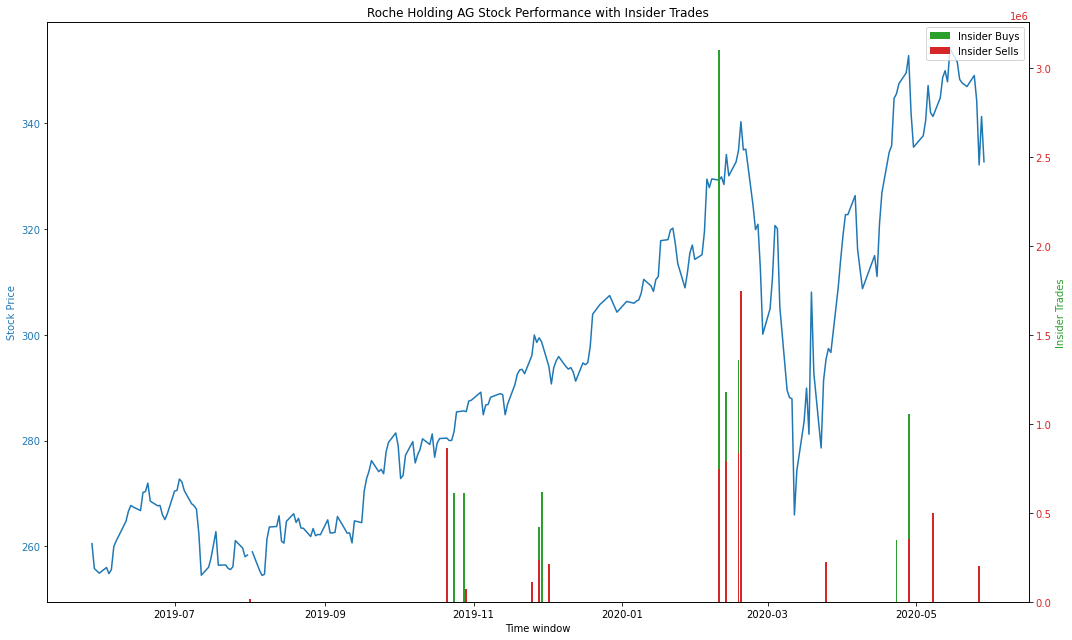

In [15]:
# Plot
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Time window')
ax1.set_ylabel('Stock Price', color=color)
ax1.plot(merged_df['Adj Close'].index, merged_df['Adj Close'], color=color, 
         label=("Stock Price of "+stock_name))
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Insider Trades', color=color)  # we already handled the x-label with ax1
ax2.bar(merged_df['Adj Close'].index, merged_df['BUYS'], color=color, label="Insider Buys")
ax2.tick_params(axis='y', labelcolor=color)

color = 'tab:red'
#ax2.set_ylabel('sin2', color=color)  # we already handled the x-label with ax1
ax2.bar(merged_df['Adj Close'].index, merged_df['SELLS'], color=color, label="Insider Sells")
ax2.tick_params(axis='y', labelcolor=color)
plt.legend()
plt.title(stock_name+" Stock Performance with Insider Trades")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()